In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use({'figure.facecolor':'white'})

Считываем данные

In [3]:
data = pd.read_excel('../data4.xlsx')

s1 (мм) - расстояние, пройденное каплей вниз,

s2 (мм) - расстояние, пройденное каплей вверх,


t1 (c) -  время прохождения капли вниз,

t2 (c) -  время прохождения капли вверх,

In [4]:
data.shape

(150, 5)

In [5]:
data.dropna(inplace=True)
data = data[data.t1 < data.t2]
data.head()

,s1,t1,s2,t2,number
0,0.29,1.22,0.29,3.35,1
1,0.29,1.43,0.29,3.35,1
2,0.29,1.42,0.29,3.43,1
3,0.29,1.33,0.29,3.38,1
4,0.29,1.26,0.29,3.44,1


Посмотрим на гистограмму распределений времени для двух капель


D:\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

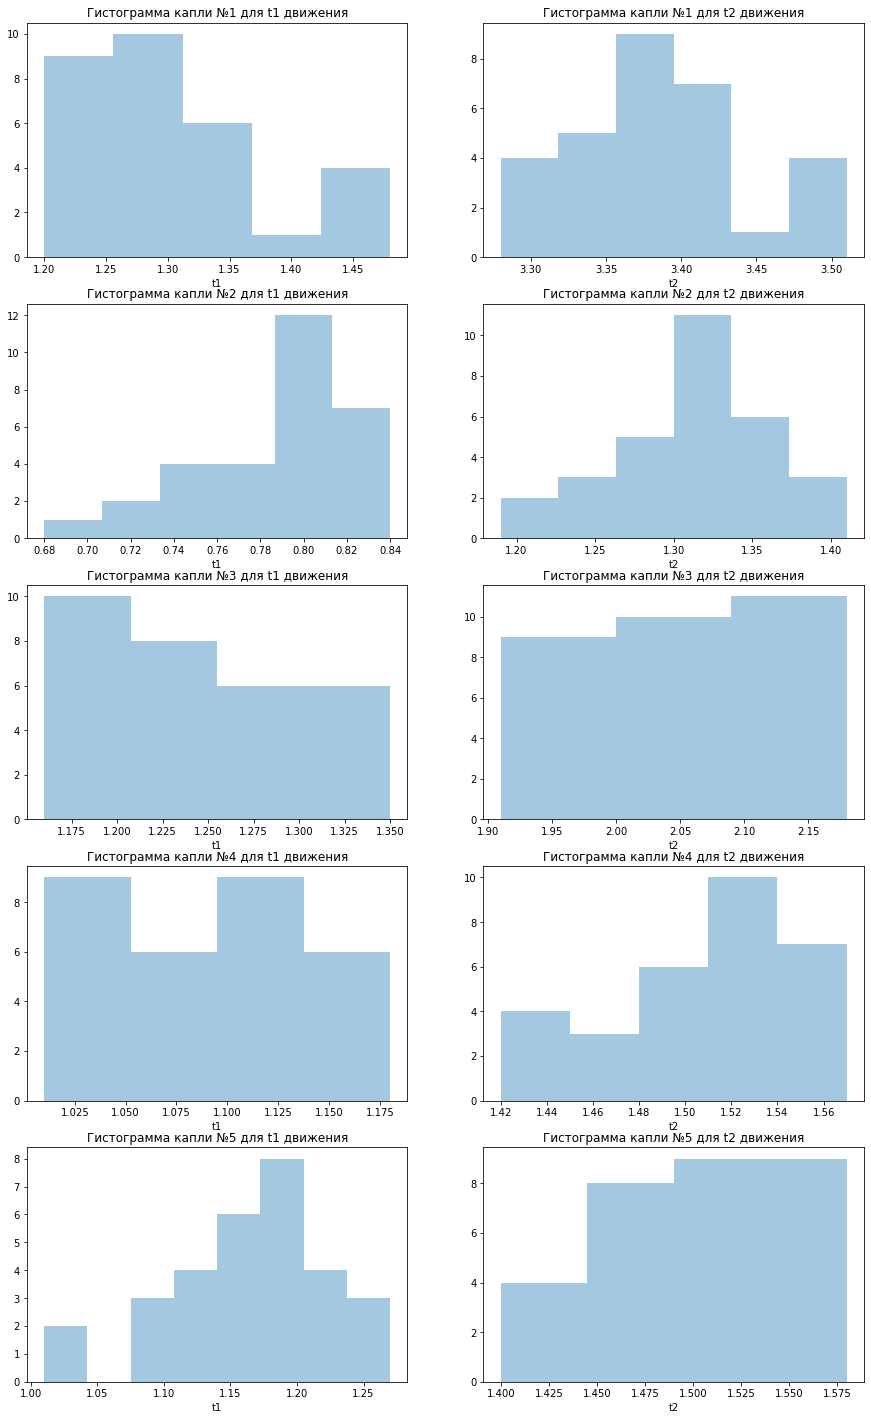

In [6]:
_, axs = plt.subplots(nrows=len(data.number.unique()), ncols=2,figsize=(15, 25))
for i, time in enumerate(['t1', 't2']):
    for n, num in enumerate(data.number.unique()):
        ax = sns.distplot(data[data.number==num][time], kde=False, ax=axs[n, i])
        ax.set_title(f'Гистограмма капли №{num} для {time} движения')

Функция, проводящая хи-квадрат тест для проверки распределения на нормальность.
Функция вохвращает расстояние хи-квадрат и p-значение.
Нулевая гипотеза утверждает, что измерения времени для каждой рассматриваемой
капли имеют нормальное распредление. Соответственно, если p-значение больше 0,05,
то принимается нулевая гипотеза о нормальности распределения.

In [7]:
from scipy.stats import chisquare, norm

def chi_test(data_t):
    mean = data_t.mean()
    std = data_t.std()
    count = data_t.count()
    _, intervals = pd.cut(data_t, 6, retbins=True)
    mean_intervals = np.array([np.mean([intervals[i], intervals[i+1]])
                               for i in range(len(intervals)-1)])
    h = intervals[1] - intervals[0]
    exp_data = np.ceil(count*h/std*norm.pdf((mean_intervals - mean)/std))
    obs_data = data_t.groupby(pd.cut(data_t,intervals)).count().values

    chisq, p = chisquare(obs_data, f_exp=exp_data)
    return chisq, p

Рассчитываем для каждой из пяти капель расстояние хи-квадрат и p-значение для величин t1 и t2

In [8]:
numbers = data.number.unique()
for num in numbers:
    chisq_t1, p_t1 = chi_test(data[data.number==num].t1)
    chisq_t2, p_t2 = chi_test(data[data.number==num].t2)
    print(f'Для капли №{num}:\n\t'
          f't1: хи-квадрат: {round(chisq_t1,3)}, p: {round(p_t1,4)}\n\t'
          f't2: хи-квадрат: {round(chisq_t2, 3)}, p: {round(p_t2, 4)}\n')

Для капли №1:
	t1: хи-квадрат: 3.693, p: 0.5944
	t2: хи-квадрат: 5.825, p: 0.3236

Для капли №2:
	t1: хи-квадрат: 6.092, p: 0.2974
	t2: хи-квадрат: 3.05, p: 0.6923

Для капли №3:
	t1: хи-квадрат: 20.536, p: 0.001
	t2: хи-квадрат: 10.552, p: 0.061

Для капли №4:
	t1: хи-квадрат: 2.438, p: 0.7858
	t2: хи-квадрат: 7.538, p: 0.1836

Для капли №5:
	t1: хи-квадрат: 3.837, p: 0.5731
	t2: хи-квадрат: 4.643, p: 0.461



Уровень значимости, превышающий 0.05, показывает, что отклонения ожидаемых и экспериментальных значений времени
статистически не значимы, следовательно, можно принять нулевую гипотезу о нормальности распределения значений времени
капель.

Построим гистограммы стандартизированных значений (z-оценок) времени капель, чтобы убедиться, что все
измеренные значения находятся в интеревале +-3 сигмы

D:\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

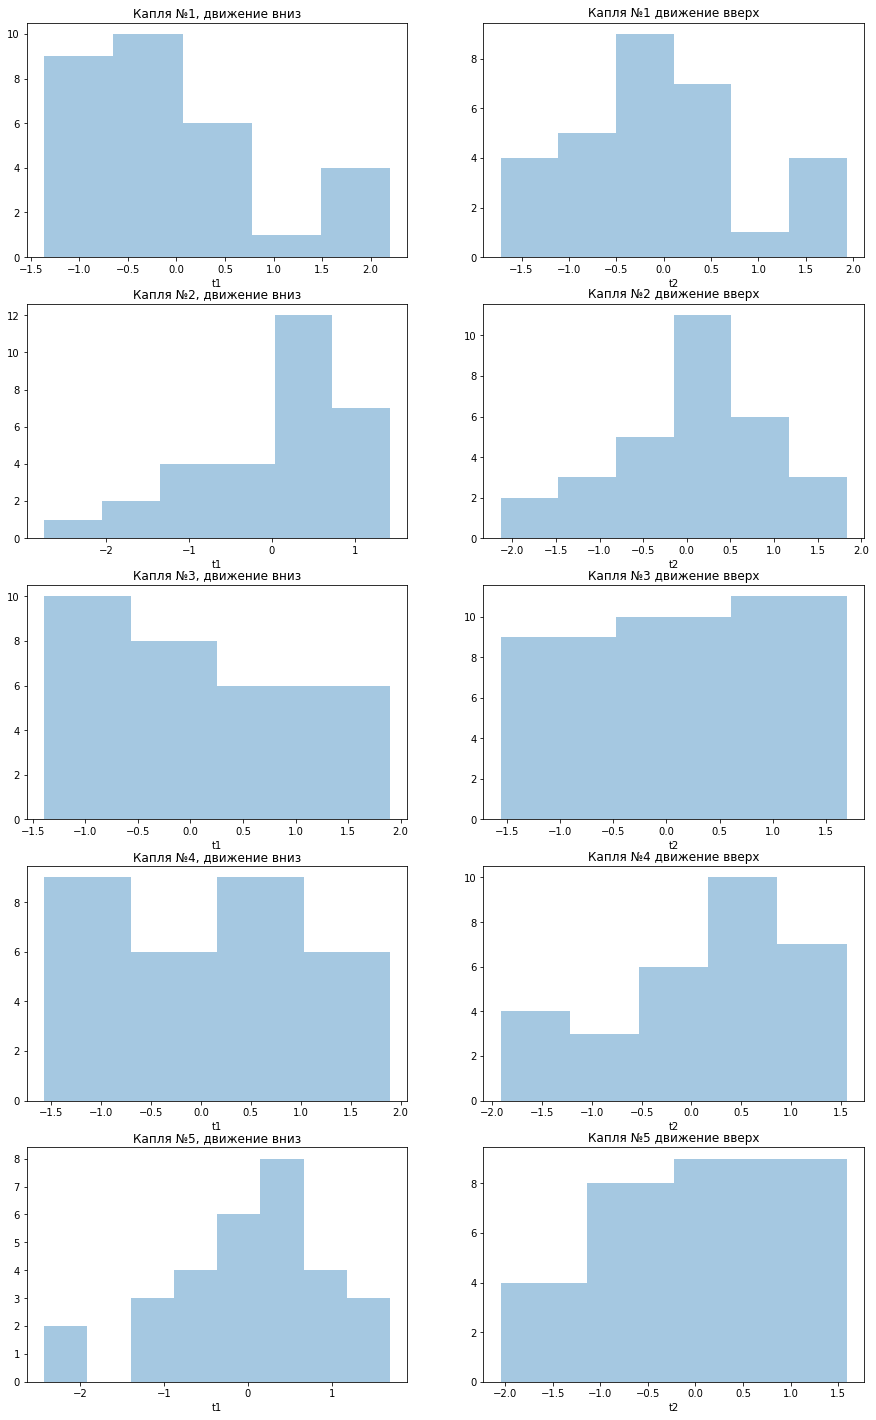

In [9]:
def to_zscore(pd_series):
    return (pd_series - pd_series.mean())/pd_series.std()

_, ax = plt.subplots(nrows=len(data.number.unique()), ncols=2,figsize=(15, 25))
for i, num in enumerate(data.number.unique()):
    ax[i, 0] = sns.distplot(to_zscore(data[data.number == num].t1), ax=ax[i, 0], kde=False)
    ax[i, 0].set_title(f'Капля №{num}, движение вниз')
    ax[i, 1] = sns.distplot(to_zscore(data[data.number == num].t2), ax=ax[i, 1], kde=False)
    ax[i, 1].set_title(f'Капля №{num} движение вверх')

Построим графики boxplot, на которых строятся доверительные интервалы значений по процентилям выборки.
Значения, не попадающие в интервал *[Q1 - (Q3-Q1), Q3 + (Q3-Q1)]*,

где *Q3* - 75% процентиль выборки,
    *Q1* - 25% процентиль выборки.

будут считаться выбросами,то есть отфильтровываться будут значения, имеющие малую частоту и слишком большие и
маленькие значения относительно медианы выборки.

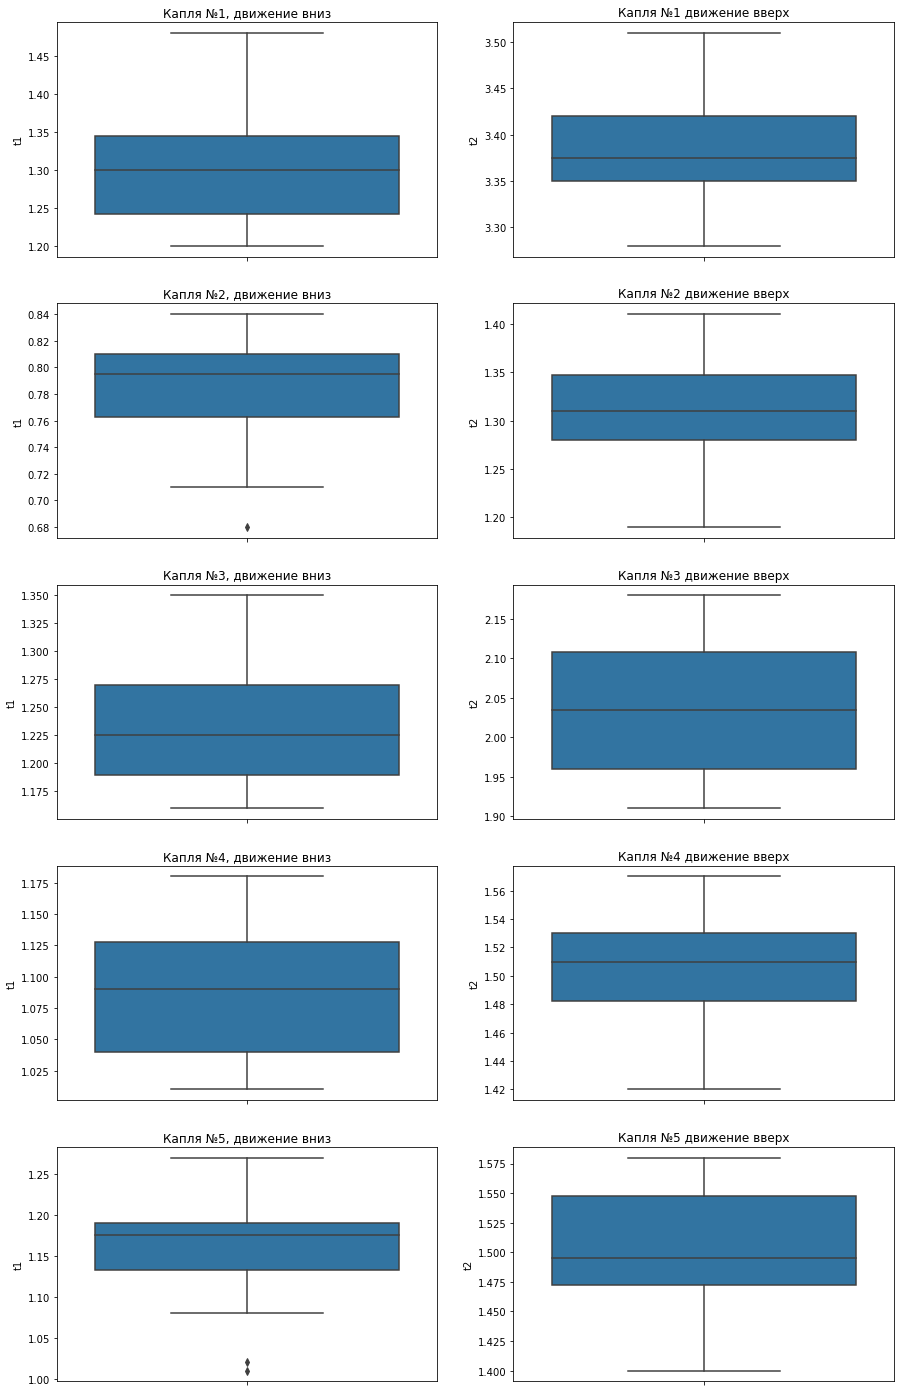

In [10]:
_, ax = plt.subplots(nrows=len(data.number.unique()), ncols=2,figsize=(15, 25))
for i, num in enumerate(data.number.unique()):

    ax[i, 0] = sns.boxplot(data=data[data.number == num], y='t1', ax=ax[i, 0])
    ax[i, 0].set_title(f'Капля №{num}, движение вниз')
    ax[i, 1] = sns.boxplot(data=data[data.number == num], y='t2', ax=ax[i, 1])
    ax[i, 1].set_title(f'Капля №{num} движение вверх')

Заметим, что выбросы в данных выборках присутствуют только в распределении t1 для второй и пятой каплях, ориентируясь на
распределение значений времени по z-шкале, можно заметить, что данные значения соответствуют наблюдениям, приближенным к
-3 сигме нормального распределения. Исключим данные значения из нашей выборки.

In [22]:
data_filt = data[((data.t1 > 1.05) & (data.number == 5))|
                 ((data.t1 > 0.70) & (data.number == 2))|
                 ((data.number != 2) & (data.number != 5))].copy()

Построим еще раз графики box-plot и пронаблюдаем отсутствие выбросов.

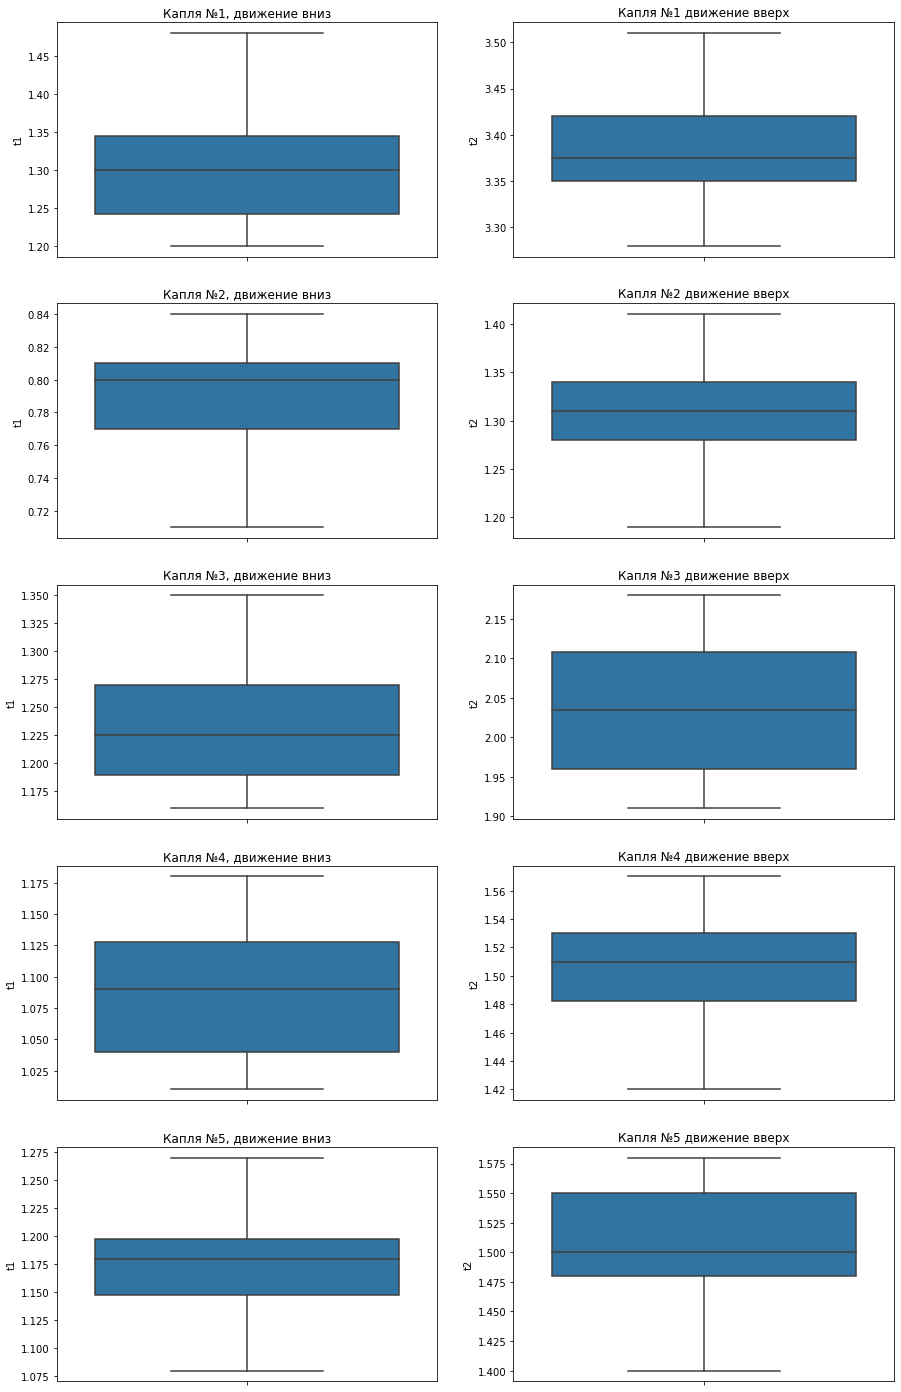

In [23]:
_, ax = plt.subplots(nrows=len(data_filt.number.unique()), ncols=2,figsize=(15, 25))
for i, num in enumerate(data_filt.number.unique()):

    ax[i, 0] = sns.boxplot(data=data_filt[data_filt.number == num], y='t1', ax=ax[i, 0])
    ax[i, 0].set_title(f'Капля №{num}, движение вниз')
    ax[i, 1] = sns.boxplot(data=data_filt[data_filt.number == num], y='t2', ax=ax[i, 1])
    ax[i, 1].set_title(f'Капля №{num} движение вверх')

QQ-plot:

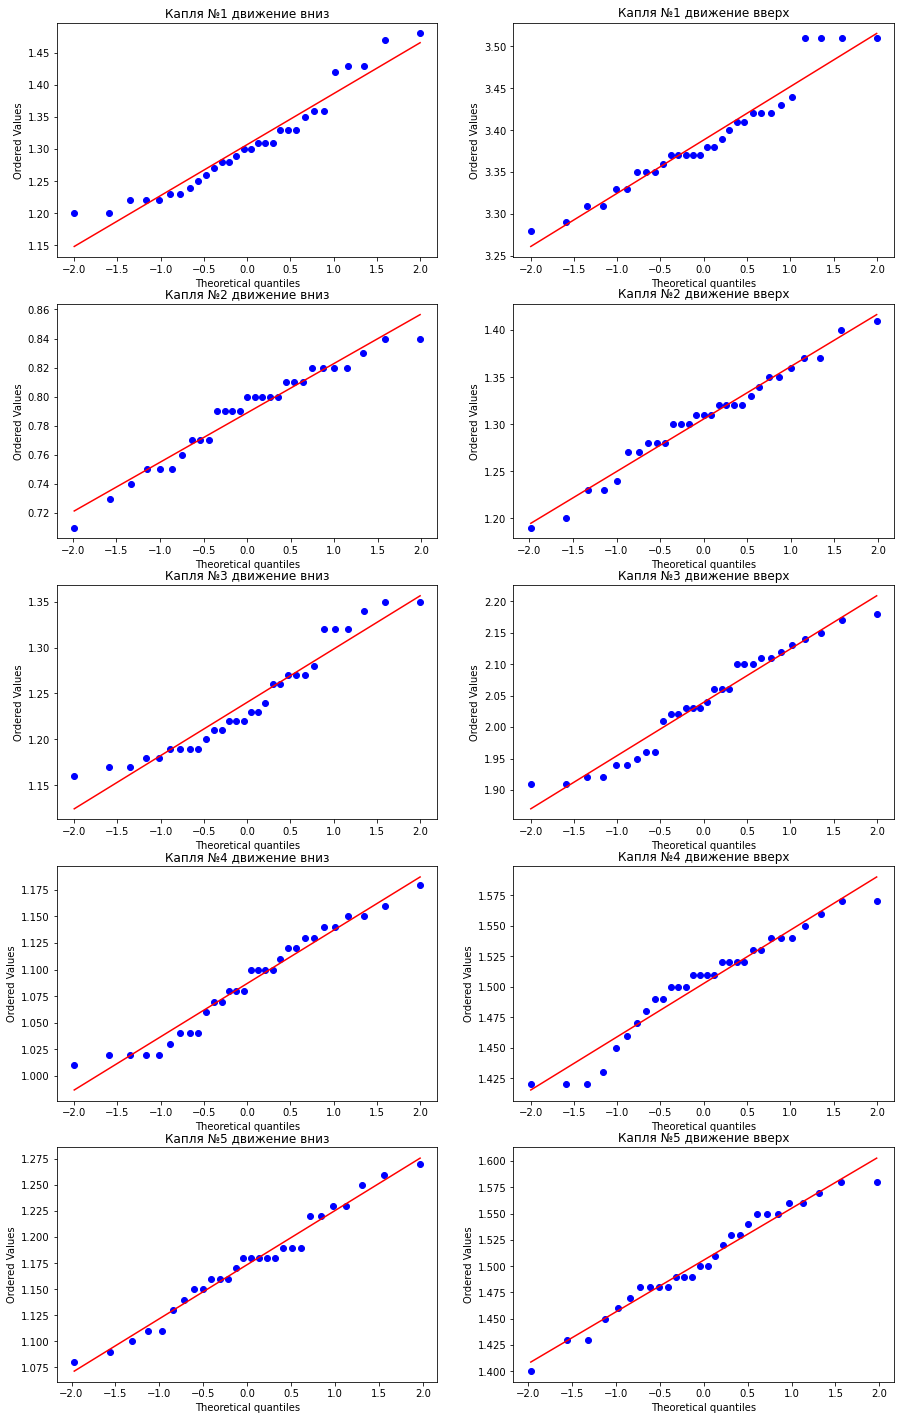

In [24]:
import pylab
import scipy.stats as stats

_, ax = plt.subplots(nrows=len(data.number.unique()), ncols=2,figsize=(15, 25))
for i, num in enumerate(data_filt.number.unique()):
    stats.probplot(data_filt[data_filt.number == num].t1, dist="norm", plot=ax[i, 0])
    ax[i, 0].set_title(f'Капля №{num} движение вниз')
    stats.probplot(data_filt[data_filt.number == num].t2, dist="norm", plot=ax[i, 1])
    ax[i, 1].set_title(f'Капля №{num} движение вверх')

Шапиро-Уилк тест (непараметрический вариант теста на нормальность):

In [26]:
from scipy.stats import shapiro, mannwhitneyu
for num in numbers:
    stat1, p_t1 = shapiro(data_filt[data_filt.number==num].t1)
    stat2, p_t2 = shapiro(data_filt[data_filt.number==num].t2)
    print(f'Капля №{num}:\n\t'
          f't1: статистика: {round(stat1,3)}, p: {round(p_t1,4)}\n\t'
          f't2: статистика: {round(stat2, 3)}, p: {round(p_t2, 4)}\n')

Капля №1:
	t1: статистика: 0.933, p: 0.0589
	t2: статистика: 0.935, p: 0.0683

Капля №2:
	t1: статистика: 0.952, p: 0.2118
	t2: статистика: 0.977, p: 0.7647

Капля №3:
	t1: статистика: 0.921, p: 0.0276
	t2: статистика: 0.943, p: 0.1106

Капля №4:
	t1: статистика: 0.951, p: 0.1744
	t2: статистика: 0.937, p: 0.076

Капля №5:
	t1: статистика: 0.973, p: 0.6663
	t2: статистика: 0.966, p: 0.4669



Также как и в хи-квадрат тесте движение вниз капли номер 3 не прошло тест на нормальность.

Рассчитаем скорость движения капель:

In [27]:
data_filt['v1'] = data_filt['s1']/data_filt['t1']*1e-3
data_filt['v2'] = data_filt['s2']/data_filt['t2']*1e-3

Рассчитаем значения заряда и радиуса капель:

In [28]:
C1 = 2.73e-11
C2 = 6.37e-5
U = 300
data_filt['Q'] = C1*((data_filt['v1']+data_filt['v2'])*
                        np.sqrt(data_filt['v1']-data_filt['v2']))/U

Построим график зависимости значения заряда капли от её радиуса для всех капель:

In [29]:
data_filt['r'] = C2*np.sqrt(data_filt['v1'] - data_filt['v2'])

<AxesSubplot:xlabel='r', ylabel='Q'>

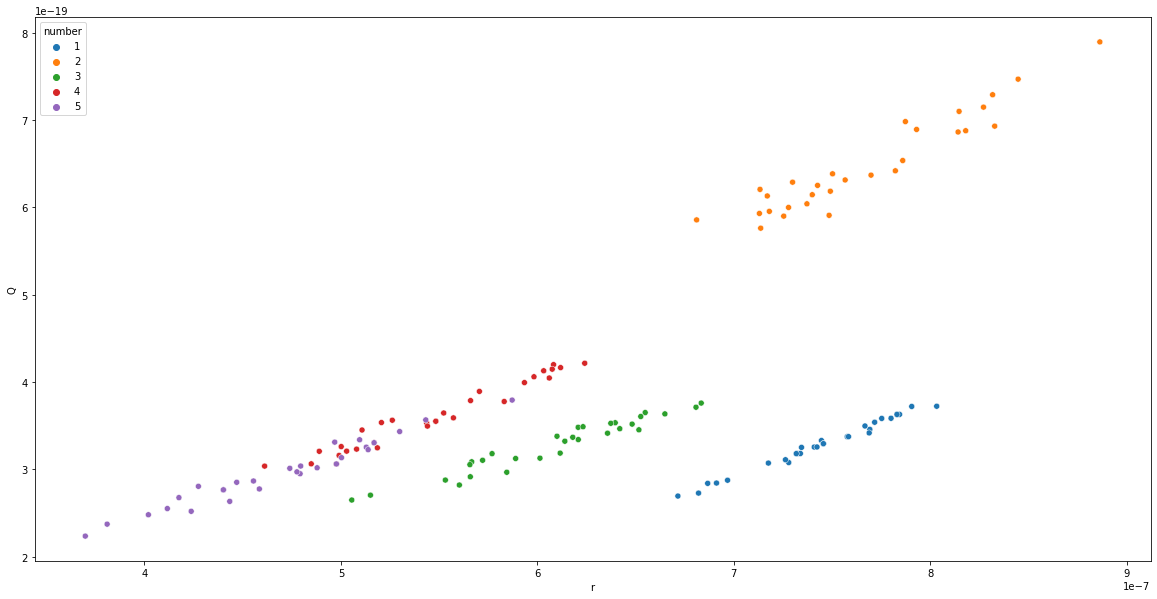

In [30]:
_, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(x='r', y='Q', hue='number',data=data_filt, ax=ax, palette='tab10') #, legend='full'

